# 08 Sampling Interfaces and Orientations from Raster

Interfaces can be directly sampled from a digital elevation model or subsurface raster/mesh while orientations have to be sampled from the digital elevation model/raster, the slope for the dipping angle and the aspect for the azimuth.

<img src="../images/tutorial08_cover.png">

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [2]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/08_sampling_interfaces_orientations_from_raster/'

## Loading raster data

In [3]:
import rasterio
import gemgis as gg

raster = rasterio.open(file_path + 'raster.tif')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
raster.bounds

BoundingBox(left=-4.440892098500626e-16, bottom=1.3642420526593924e-12, right=971.002897605575, top=1068.1031873661339)

## Plotting the raster

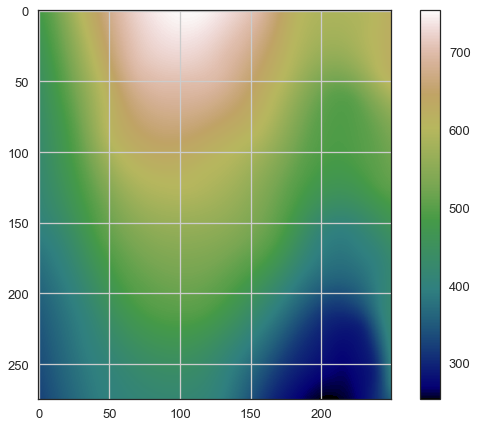

In [4]:
import matplotlib.pyplot as plt

im = plt.imshow(raster.read(1), cmap='gist_earth')
plt.grid()
plt.colorbar(im)

## Sampling Interfaces from Raster

### Sampling by lists

Sampling interfaces from a raster given lists of X and Y coordinates is done using ``sample_interfaces(..)``.

In [1]:
point_x = [100, 200, 300, 400, 500]
point_y = [100, 200, 300, 400, 500]

gdf = gg.raster.sample_interfaces(raster=raster, 
                                  point_x=point_x,
                                  point_y=point_y,
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

NameError: name 'gg' is not defined

### Plotting the data

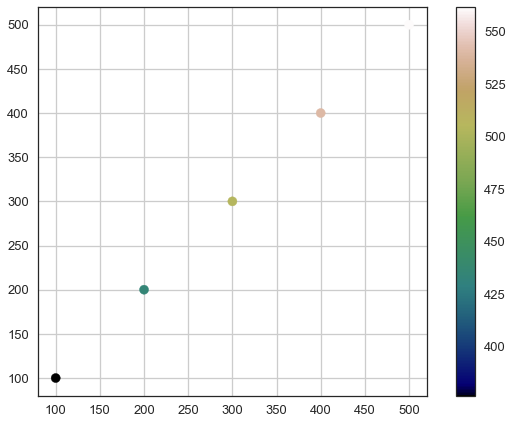

In [5]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling by arrays

Sampling interfaces from an array given lists of X and Y coordinates.

In [6]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_interfaces(raster=raster.read(1), 
                                  point_x=point_x,
                                  point_y=point_y,
                                  extent=[0, 972, 0 ,1069],
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,100.00,100.00,378.80,POINT (100.000 100.000),Test
1,200.00,200.00,435.22,POINT (200.000 200.000),Test
2,300.00,300.00,505.29,POINT (300.000 300.000),Test
3,400.00,400.00,541.74,POINT (400.000 400.000),Test
4,500.00,500.00,562.02,POINT (500.000 500.000),Test


### Plotting the data

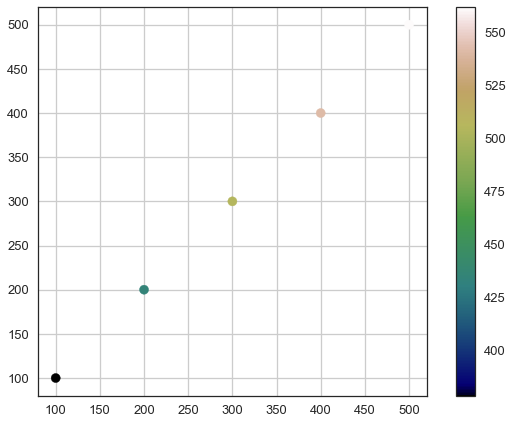

In [7]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling Randomly from rasterio object

Sampling interfaces randomly from a raster.

In [50]:
gdf = gg.raster.sample_interfaces(raster=raster, 
                                  random_samples=10,
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,672.13,270.79,393.47,POINT (672.134 270.790),Test
1,714.41,819.54,552.90,POINT (714.410 819.537),Test
2,467.25,804.78,673.29,POINT (467.255 804.783),Test
3,889.50,251.05,340.14,POINT (889.500 251.050),Test
4,504.24,896.90,695.72,POINT (504.237 896.900),Test
5,42.04,737.62,455.56,POINT (42.040 737.618),Test
6,399.08,803.35,680.29,POINT (399.078 803.355),Test
7,776.17,557.09,460.34,POINT (776.169 557.090),Test
8,426.95,301.13,515.22,POINT (426.950 301.135),Test
9,342.16,1056.68,745.20,POINT (342.157 1056.679),Test


### Plotting the data

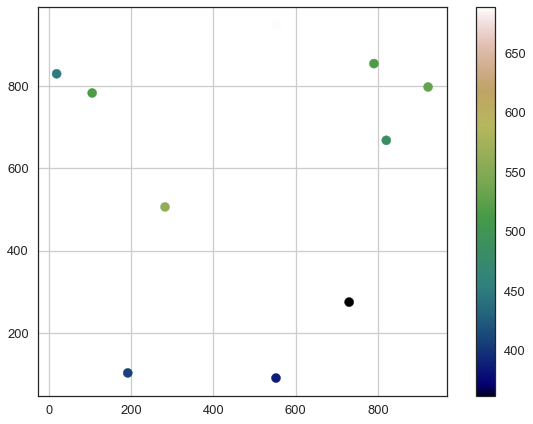

In [9]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling Randomly from Array

Sampling interfaces randomly from an array.

In [10]:
gdf = gg.raster.sample_interfaces(raster=raster.read(1), 
                                  random_samples=10,
                                  extent=[0, 972, 0 ,1069],
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,821.84,607.51,471.96,POINT (821.844 607.508),Test
1,502.98,170.40,444.27,POINT (502.983 170.401),Test
2,824.49,508.28,424.52,POINT (824.494 508.280),Test
3,333.74,735.04,655.60,POINT (333.744 735.037),Test
4,692.10,785.55,557.02,POINT (692.097 785.548),Test
5,463.58,49.58,417.35,POINT (463.580 49.579),Test
6,221.42,352.25,495.66,POINT (221.422 352.251),Test
7,766.70,473.74,422.60,POINT (766.700 473.743),Test
8,909.55,27.52,290.31,POINT (909.550 27.522),Test
9,795.78,792.39,498.64,POINT (795.777 792.391),Test


### Plotting the data

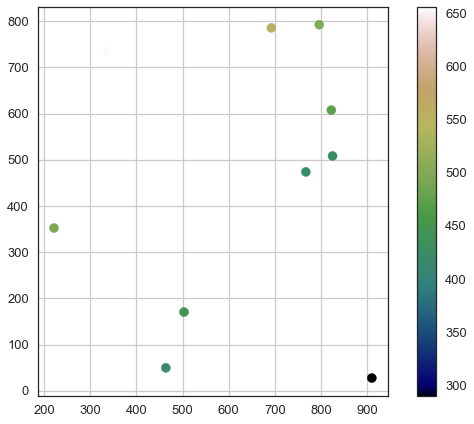

In [11]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

## Sampling Orientations from Raster

### Sampling from lists

Sampling orientations from a raster given lists of X and Y coordinates.

In [12]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_orientations(raster=raster, 
                                    point_x=point_x,
                                    point_y=point_y,
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,100.00,100.00,376.72,POINT (100.000 100.000),Test,23.77,255.93,1
1,200.00,200.00,435.22,POINT (200.000 200.000),Test,30.46,239.55,1
2,300.00,300.00,505.29,POINT (300.000 300.000),Test,17.34,222.68,1
3,400.00,400.00,540.68,POINT (400.000 400.000),Test,15.51,178.84,1
4,500.00,500.00,561.65,POINT (500.000 500.000),Test,19.26,145.55,1


### Plotting the data

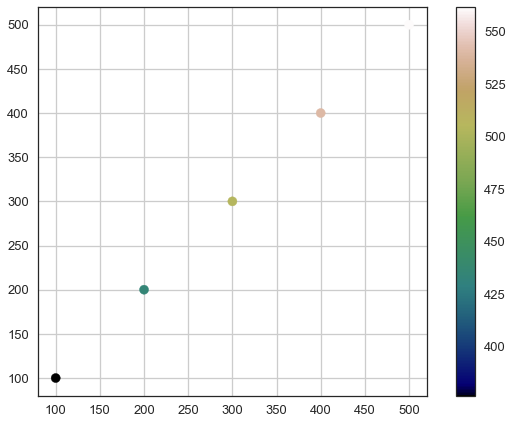

In [13]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling from arrays

Sampling orientations from an array given lists of X and Y coordinates.

In [14]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_orientations(raster=raster.read(1), 
                                    point_x=point_x,
                                    point_y=point_y,
                                    extent=[0, 972, 0 ,1069],
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,100.00,100.00,378.80,POINT (100.000 100.000),Test,23.75,255.93,1
1,200.00,200.00,435.22,POINT (200.000 200.000),Test,30.44,239.55,1
2,300.00,300.00,505.29,POINT (300.000 300.000),Test,17.32,222.68,1
3,400.00,400.00,541.74,POINT (400.000 400.000),Test,15.50,178.84,1
4,500.00,500.00,562.02,POINT (500.000 500.000),Test,19.24,145.55,1


### Sampling randomly from rasterio object

Sampling orientations randomly from a raster.

In [16]:
gdf = gg.raster.sample_orientations(raster=raster, 
                                    random_samples=10,
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,498.10,747.09,639.61,POINT (498.099 747.088),Test,27.52,149.04,1
1,402.68,1040.05,747.58,POINT (402.685 1040.048),Test,11.25,178.61,1
2,54.08,385.02,397.73,POINT (54.080 385.024),Test,25.00,249.13,1
3,152.61,679.71,543.43,POINT (152.607 679.705),Test,47.91,252.85,1
4,533.62,1054.60,723.82,POINT (533.623 1054.601),Test,23.76,125.68,1
5,882.15,921.22,572.99,POINT (882.147 921.224),Test,35.66,233.80,1
6,839.61,710.91,490.91,POINT (839.614 710.914),Test,5.73,240.20,1
7,442.41,76.81,429.44,POINT (442.409 76.807),Test,20.54,138.88,1
8,288.13,737.22,647.40,POINT (288.130 737.217),Test,22.81,218.87,1
9,38.71,692.95,448.73,POINT (38.707 692.954),Test,34.77,262.12,1


### Plotting the data

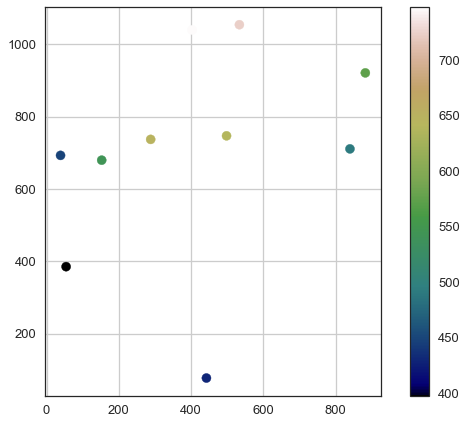

In [17]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sample randomly from array

Sampling orientations randomly from an array.

In [18]:
gdf = gg.raster.sample_orientations(raster=raster.read(1), 
                                    random_samples=10,
                                    extent=[0, 972, 0 ,1069],
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,566.25,850.19,653.41,POINT (566.248 850.186),Test,30.39,120.36,1
1,918.00,524.51,459.31,POINT (918.000 524.509),Test,34.90,219.18,1
2,941.56,187.72,373.87,POINT (941.559 187.725),Test,62.68,255.66,1
3,607.35,680.96,578.53,POINT (607.346 680.959),Test,31.42,129.48,1
4,426.02,210.82,486.42,POINT (426.020 210.823),Test,25.47,162.13,1
5,478.04,142.69,441.46,POINT (478.041 142.691),Test,30.27,137.91,1
6,852.45,59.84,268.07,POINT (852.453 59.844),Test,15.57,243.60,1
7,501.87,381.91,525.82,POINT (501.865 381.908),Test,21.77,144.49,1
8,92.52,659.61,486.47,POINT (92.521 659.608),Test,37.33,257.22,1
9,159.65,34.81,393.70,POINT (159.649 34.809),Test,17.44,253.74,1


### Plotting the data

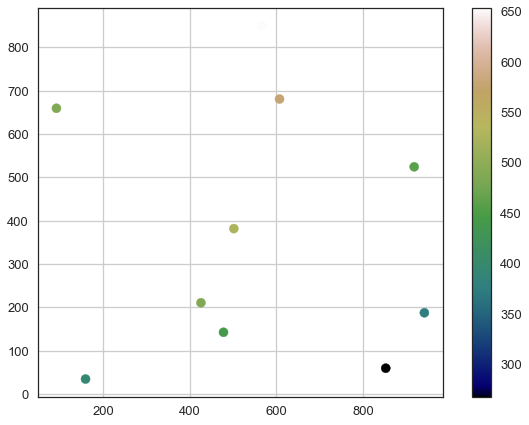

In [19]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()